In [ ]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
df = pd.read_csv('/content/Cleaned cancer patient data sets.csv')

NameError: ignored

In [ ]:
df.info()

NameError: ignored

In [ ]:
df.head()

Patient_ID  age  gender  air_pollution  alcohol_use  dust_allergy  \
0           1   33       1              2            4             5   
1           2   17       1              3            1             5   
2           3   35       1              4            5             6   
3           4   37       1              7            7             7   
4           5   46       1              6            8             7   

   occupational_hazards  genetic_risk  chronic_lung_disease  balanced_diet  \
0                     4             3                     2              2   
1                     3             4                     2              2   
2                     5             5                     4              6   
3                     7             6                     7              7   
4                     7             7                     6              7   

   ...  fatigue  weight_loss  shortness_of_breath  wheezing  \
0  ...        3            4                    2         2   
1  ...        1            3                    7         8   
2  ...        8            7                    9         2   
3  ...        4            2                    3         1   
4  ...        3            2                    4         1   

   swallowing_difficulty  clubbing_of_finger_nails  frequent_cold  dry_cough  \
0                      3                         1              2          3   
1                      6                         2              1          7   
2                      1                         4              6          7   
3                      4                         5              6          7   
4                      4                         2              4          2   

   snoring   level  
0        4     Low  
1        2  Medium  
2        2    High  
3        5    High  
4        3    High  

[5 rows x 25 columns]

In [ ]:
df = df.replace({'level': {'Low': 1, 'Medium': 2, 'High': 3}})
df.head()

Patient_ID  age  gender  air_pollution  alcohol_use  dust_allergy  \
0           1   33       1              2            4             5   
1           2   17       1              3            1             5   
2           3   35       1              4            5             6   
3           4   37       1              7            7             7   
4           5   46       1              6            8             7   

   occupational_hazards  genetic_risk  chronic_lung_disease  balanced_diet  \
0                     4             3                     2              2   
1                     3             4                     2              2   
2                     5             5                     4              6   
3                     7             6                     7              7   
4                     7             7                     6              7   

   ...  fatigue  weight_loss  shortness_of_breath  wheezing  \
0  ...        3            4                    2         2   
1  ...        1            3                    7         8   
2  ...        8            7                    9         2   
3  ...        4            2                    3         1   
4  ...        3            2                    4         1   

   swallowing_difficulty  clubbing_of_finger_nails  frequent_cold  dry_cough  \
0                      3                         1              2          3   
1                      6                         2              1          7   
2                      1                         4              6          7   
3                      4                         5              6          7   
4                      4                         2              4          2   

   snoring  level  
0        4      1  
1        2      2  
2        2      3  
3        5      3  
4        3      3  

[5 rows x 25 columns]

In [ ]:
df['label'] = pd.cut(x=df['level'], bins=[1,2,3],
                     labels=['0','1'])

In [ ]:
df.isnull()

Patient_ID    age  gender  air_pollution  alcohol_use  dust_allergy  \
0         False  False   False          False        False         False   
1         False  False   False          False        False         False   
2         False  False   False          False        False         False   
3         False  False   False          False        False         False   
4         False  False   False          False        False         False   
..          ...    ...     ...            ...          ...           ...   
995       False  False   False          False        False         False   
996       False  False   False          False        False         False   
997       False  False   False          False        False         False   
998       False  False   False          False        False         False   
999       False  False   False          False        False         False   

     occupational_hazards  genetic_risk  chronic_lung_disease  balanced_diet  \
0                   False         False                 False          False   
1                   False         False                 False          False   
2                   False         False                 False          False   
3                   False         False                 False          False   
4                   False         False                 False          False   
..                    ...           ...                   ...            ...   
995                 False         False                 False          False   
996                 False         False                 False          False   
997                 False         False                 False          False   
998                 False         False                 False          False   
999                 False         False                 False          False   

     ...  weight_loss  shortness_of_breath  wheezing  swallowing_difficulty  \
0    ...        False                False     False                  False   
1    ...        False                False     False                  False   
2    ...        False                False     False                  False   
3    ...        False                False     False                  False   
4    ...        False                False     False                  False   
..   ...          ...                  ...       ...                    ...   
995  ...        False                False     False                  False   
996  ...        False                False     False                  False   
997  ...        False                False     False                  False   
998  ...        False                False     False                  False   
999  ...        False                False     False                  False   

     clubbing_of_finger_nails  frequent_cold  dry_cough  snoring  level  label  
0                       False          False      False    False  False   True  
1                       False          False      False    False  False  False  
2                       False          False      False    False  False  False  
3                       False          False      False    False  False  False  
4                       False          False      False    False  False  False  
..                        ...            ...        ...      ...    ...    ...  
995                     False          False      False    False  False  False  
996                     False          False      False    False  False  False  
997                     False          False      False    False  False  False  
998                     False          False      False    False  False  False  
999                     False          False      False    False  False  False  

[1000 rows x 26 columns]

In [ ]:
df.isnull().sum()

Patient_ID                    0
age                           0
gender                        0
air_pollution                 0
alcohol_use                   0
dust_allergy                  0
occupational_hazards          0
genetic_risk                  0
chronic_lung_disease          0
balanced_diet                 0
obesity                       0
smoking                       0
passive_smoker                0
chest_pain                    0
coughing_of_blood             0
fatigue                       0
weight_loss                   0
shortness_of_breath           0
wheezing                      0
swallowing_difficulty         0
clubbing_of_finger_nails      0
frequent_cold                 0
dry_cough                     0
snoring                       0
level                         0
label                       303
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Patient_ID                1000 non-null   int64   
 1   age                       1000 non-null   int64   
 2   gender                    1000 non-null   int64   
 3   air_pollution             1000 non-null   int64   
 4   alcohol_use               1000 non-null   int64   
 5   dust_allergy              1000 non-null   int64   
 6   occupational_hazards      1000 non-null   int64   
 7   genetic_risk              1000 non-null   int64   
 8   chronic_lung_disease      1000 non-null   int64   
 9   balanced_diet             1000 non-null   int64   
 10  obesity                   1000 non-null   int64   
 11  smoking                   1000 non-null   int64   
 12  passive_smoker            1000 non-null   int64   
 13  chest_pain                1000 non-null   int64  

In [ ]:
#df['label'] = df['label'].astype(float)

In [ ]:
df['label'] = df['label'].astype(float)
df['label'] = df['label'].fillna(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient_ID                1000 non-null   int64  
 1   age                       1000 non-null   int64  
 2   gender                    1000 non-null   int64  
 3   air_pollution             1000 non-null   int64  
 4   alcohol_use               1000 non-null   int64  
 5   dust_allergy              1000 non-null   int64  
 6   occupational_hazards      1000 non-null   int64  
 7   genetic_risk              1000 non-null   int64  
 8   chronic_lung_disease      1000 non-null   int64  
 9   balanced_diet             1000 non-null   int64  
 10  obesity                   1000 non-null   int64  
 11  smoking                   1000 non-null   int64  
 12  passive_smoker            1000 non-null   int64  
 13  chest_pain                1000 non-null   int64  
 14  coughing_

In [ ]:
df['label'] = df['label'].astype(int)


In [ ]:
y= df['label']
X=df.iloc[:,1:23]

In [ ]:
df.head()

Patient_ID  age  gender  air_pollution  alcohol_use  dust_allergy  \
0           1   33       1              2            4             5   
1           2   17       1              3            1             5   
2           3   35       1              4            5             6   
3           4   37       1              7            7             7   
4           5   46       1              6            8             7   

   occupational_hazards  genetic_risk  chronic_lung_disease  balanced_diet  \
0                     4             3                     2              2   
1                     3             4                     2              2   
2                     5             5                     4              6   
3                     7             6                     7              7   
4                     7             7                     6              7   

   ...  weight_loss  shortness_of_breath  wheezing  swallowing_difficulty  \
0  ...            4                    2         2                      3   
1  ...            3                    7         8                      6   
2  ...            7                    9         2                      1   
3  ...            2                    3         1                      4   
4  ...            2                    4         1                      4   

   clubbing_of_finger_nails  frequent_cold  dry_cough  snoring  level  label  
0                         1              2          3        4      1      0  
1                         2              1          7        2      2      0  
2                         4              6          7        2      3      1  
3                         5              6          7        5      3      1  
4                         2              4          2        3      3      1  

[5 rows x 26 columns]

In [ ]:
cancer_patients = pd.DataFrame(df)
cancer_patients.to_csv("Cleaned cancer NB_DT_SVM.csv", index= False)

In [ ]:
##Train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

In [ ]:
X_train

age  gender  air_pollution  alcohol_use  dust_allergy  \
601   35       1              2            1             5   
396   45       2              1            2             3   
269   35       1              1            3             2   
766   39       2              6            8             7   
345   39       1              4            5             6   
..   ...     ...            ...          ...           ...   
440   44       1              6            7             7   
165   38       2              5            2             3   
7     28       2              3            1             4   
219   37       2              6            8             7   
326   26       2              7            7             7   

     occupational_hazards  genetic_risk  chronic_lung_disease  balanced_diet  \
601                     3             2                     3              2   
396                     4             2                     4              3   
269                     4             2                     6              2   
766                     7             7                     6              7   
345                     6             5                     4              6   
..                    ...           ...                   ...            ...   
440                     7             7                     6              7   
165                     1             2                     3              5   
7                       3             2                     3              4   
219                     7             7                     6              7   
326                     7             7                     6              7   

     obesity  ...  chest_pain  coughing_of_blood  fatigue  weight_loss  \
601        4  ...           2                  4        6            7   
396        3  ...           3                  4        4            1   
269        2  ...           3                  4        4            2   
766        7  ...           7                  9        3            2   
345        6  ...           6                  6        5            3   
..       ...  ...         ...                ...      ...          ...   
440        7  ...           7                  7        5            3   
165        2  ...           1                  3        1            1   
7          3  ...           3                  1        3            2   
219        7  ...           7                  7        9            6   
326        7  ...           7                  7        2            7   

     shortness_of_breath  wheezing  swallowing_difficulty  \
601                    2         5                      8   
396                    2         4                      6   
269                    2         2                      3   
766                    4         1                      4   
345                    2         4                      3   
..                   ...       ...                    ...   
440                    2         7                      8   
165                    1         1                      1   
7                      2         4                      2   
219                    5         7                      2   
326                    6         7                      6   

     clubbing_of_finger_nails  frequent_cold  dry_cough  
601                         1              3          2  
396                         5              4          2  
269                         2              1          2  
766                         2              4          2  
345                         1              7          5  
..                        ...            ...        ...  
440                         2              4          5  
165                         3              2          4  
7                           2              3          4  
219                         4              3          1  
326                         7          

In [ ]:
X_test

age  gender  air_pollution  alcohol_use  dust_allergy  \
204   46       1              6            8             7   
71    62       1              6            8             7   
594   45       2              1            2             4   
672   33       1              2            4             5   
14    27       2              3            1             4   
..   ...     ...            ...          ...           ...   
199   33       1              6            8             7   
383   38       2              3            2             1   
764   19       1              6            8             7   
197   35       1              6            8             7   
707   26       1              2            3             1   

     occupational_hazards  genetic_risk  chronic_lung_disease  balanced_diet  \
204                     7             7                     6              7   
71                      7             7                     6              2   
594                     5             6                     5              5   
672                     4             3                     2              2   
14                      2             3                     2              3   
..                    ...           ...                   ...            ...   
199                     7             7                     6              7   
383                     3             2                     1              3   
764                     7             7                     6              7   
197                     7             7                     6              2   
707                     4             3                     2              3   

     obesity  ...  chest_pain  coughing_of_blood  fatigue  weight_loss  \
204        7  ...           7                  9        3            2   
71         4  ...           4                  3        2            7   
594        4  ...           7                  2        3            8   
672        4  ...           2                  4        3            4   
14         3  ...           4                  2        2            2   
..       ...  ...         ...                ...      ...          ...   
199        7  ...           7                  7        9            6   
383        2  ...           2                  2        2            2   
764        7  ...           7                  7        9            6   
197        4  ...           4                  3        2            7   
707        4  ...           4                  3        1            2   

     shortness_of_breath  wheezing  swallowing_difficulty  \
204                    4         1                      4   
71                     6         5                      1   
594                    7         3                      8   
672                    2         2                      3   
14                     3         4                      1   
..                   ...       ...                    ...   
199                    5         7                      2   
383                    1         3                      4   
764                    5         7                      2   
197                    6         5                      1   
707                    3         4                      5   

     clubbing_of_finger_nails  frequent_cold  dry_cough  
204                         2              4          2  
71                          9              3          4  
594                         3              2          3  
672                         1              2          3  
14                          5              2          6  
..                        ...            ...        ...  
199                         4              3          1  
383                         4              1          4  
764                         4              3          1  
197                         9              3          4  
707                         1          

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Patient_ID                1000 non-null   int64
 1   age                       1000 non-null   int64
 2   gender                    1000 non-null   int64
 3   air_pollution             1000 non-null   int64
 4   alcohol_use               1000 non-null   int64
 5   dust_allergy              1000 non-null   int64
 6   occupational_hazards      1000 non-null   int64
 7   genetic_risk              1000 non-null   int64
 8   chronic_lung_disease      1000 non-null   int64
 9   balanced_diet             1000 non-null   int64
 10  obesity                   1000 non-null   int64
 11  smoking                   1000 non-null   int64
 12  passive_smoker            1000 non-null   int64
 13  chest_pain                1000 non-null   int64
 14  coughing_of_blood         1000 non-null  

In [ ]:
#Multinomial NB

clf=MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB()

In [ ]:
y_prednb = clf.predict(X_test)
print(confusion_matrix(y_test, y_prednb))
print(classification_report(y_test, y_prednb))

[[132  16]
 [ 15  87]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       148
           1       0.84      0.85      0.85       102

    accuracy                           0.88       250
   macro avg       0.87      0.87      0.87       250
weighted avg       0.88      0.88      0.88       250



In [1]:
conf_mat1 = confusion_matrix(y_test, y_prednb)
sns.heatmap(conf_mat1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Naive Bayes: Confusion Matrix')

NameError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_prednb)
cm

array([[132,  16],
       [ 15,  87]])

In [ ]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
pip install graphviz

In [ ]:
from sklearn import tree

In [ ]:
pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107719 sha256=d86c680e89c6acc68a04ea32adf83fa9e58f267b1971da141977d7ecaa3b34c9
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
import graphviz
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(7,12),
    'min_samples_split': range(1,15),
    'min_samples_leaf': range(1,15)
}

In [ ]:
grid_search = GridSearchCV(classifier, parameters, cv=5)

In [ ]:
grid_search.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
700 fits failed out of a total of 9800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
700 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _val

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(7, 12),
                         'min_samples_leaf': range(1, 15),
                         'min_samples_split': range(1, 15)})

In [ ]:
print("Best parameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

Best parameters:  {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best accuracy score:  1.0


In [ ]:
decision_tree = DecisionTreeClassifier(criterion='gini', random_state=0, max_depth=2, min_samples_split=10, min_samples_leaf=5)
decision_tree = decision_tree.fit(X_train, y_train)

fit_accuracy = decision_tree.score(X_train, y_train)
test_accuracy = decision_tree.score(X_test, y_test)

print("Train accuracy: {:.2%}".format(fit_accuracy))
print("Test accuracy: {:.2%}".format(test_accuracy))
print(decision_tree)

Train accuracy: 97.07%
Test accuracy: 97.20%
DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, min_samples_split=10,
                       random_state=0)


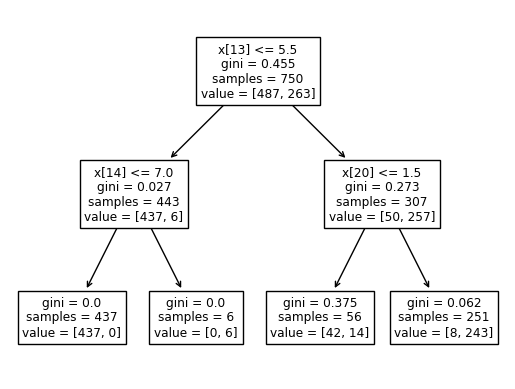

In [ ]:
tree.plot_tree(decision_tree)
plt.show()

In [ ]:
fig = plt.figure(figsize=(100,100))
_ = tree.plot_tree(decision_tree,
                   feature_names=X.columns,
                   class_names= str(df.level),
                   filled=True)

In [ ]:
decision_tree_prediction = decision_tree.predict(X_test)

bn_matrix_R = confusion_matrix(y_test, decision_tree_prediction)
print("\nThe confusion matrix is:")
print(bn_matrix_R)


The confusion matrix is:
[[146   2]
 [  5  97]]


In [ ]:
FeatureImpR=decision_tree.feature_importances_
indicesR = np.argsort(FeatureImpR)[::-1]
indicesR
feature_namesR = X.columns
print ("feature name: ", feature_namesR[indicesR])

feature name:  Index(['coughing_of_blood', 'frequent_cold', 'fatigue', 'dry_cough',
       'balanced_diet', 'gender', 'air_pollution', 'alcohol_use',
       'dust_allergy', 'occupational_hazards', 'genetic_risk',
       'chronic_lung_disease', 'smoking', 'obesity', 'passive_smoker',
       'chest_pain', 'weight_loss', 'shortness_of_breath', 'wheezing',
       'swallowing_difficulty', 'clubbing_of_finger_nails', 'age'],
      dtype='object')


1. feature 13 (0.806396)
feature name:  coughing_of_blood
2. feature 20 (0.154800)
feature name:  frequent_cold
3. feature 14 (0.038804)
feature name:  fatigue


Text(0.5, 1.0, 'Decision Tree: Confusion Matrix')

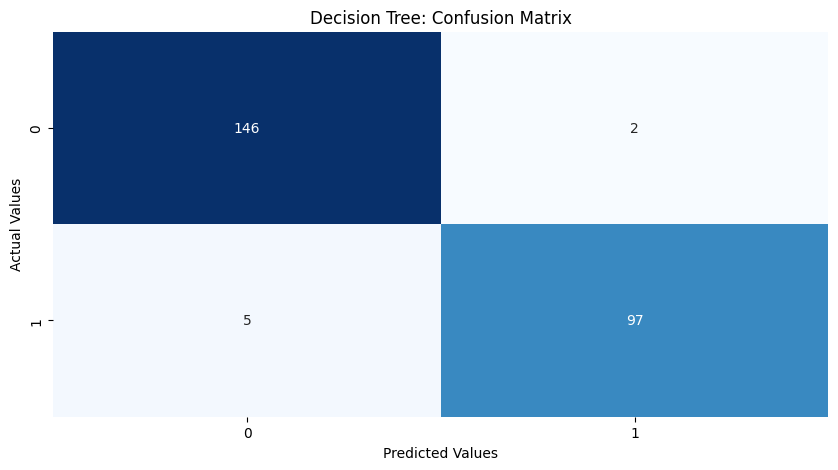

In [ ]:
for f1 in range(X_train.shape[1]):
    if FeatureImpR[indicesR[f1]] > 0:
        print("%d. feature %d (%f)" % (f1 + 1, indicesR[f1], FeatureImpR[indicesR[f1]]))
        print ("feature name: ", feature_namesR[indicesR[f1]])

labels_predicted = decision_tree.predict(X_test)
plt.subplots(figsize=(10,5))

conf_mat = confusion_matrix(y_test, labels_predicted)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Decision Tree: Confusion Matrix')

In [ ]:
print(classification_report(y_test, labels_predicted))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       148
           1       0.98      0.95      0.97       102

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250



In [ ]:
decision_tree1 = DecisionTreeClassifier(criterion='gini', max_depth=1, min_samples_split=100, min_samples_leaf=5)
decision_tree1 = decision_tree1.fit(X_train, y_train)

fit_accuracy = decision_tree1.score(X_train, y_train)
test_accuracy = decision_tree1.score(X_test, y_test)

print("Train accuracy: {:.2%}".format(fit_accuracy))
print("Test accuracy: {:.2%}".format(test_accuracy))
print(decision_tree1)

Train accuracy: 92.53%
Test accuracy: 94.40%
DecisionTreeClassifier(max_depth=1, min_samples_leaf=5, min_samples_split=100)


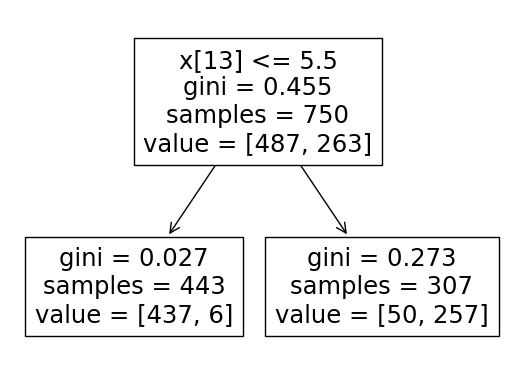

In [ ]:
tree.plot_tree(decision_tree1)
plt.show()

In [ ]:
fig = plt.figure(figsize=(100,100))
_ = tree.plot_tree(decision_tree1,
                   feature_names=X.columns,
                   class_names= str(df.level),
                   filled=True)

In [ ]:
decision_tree_prediction1 = decision_tree1.predict(X_test)

bn_matrix_R = confusion_matrix(y_test, decision_tree_prediction1)
print("\nThe confusion matrix is:")
print(bn_matrix_R)


The confusion matrix is:
[[138  10]
 [  4  98]]


In [ ]:
FeatureImpR1=decision_tree1.feature_importances_
indicesR1 = np.argsort(FeatureImpR1)[::-1]
indicesR1
feature_namesR1 = X.columns
print ("feature name: ", feature_namesR1[indicesR1])

feature name:  Index(['coughing_of_blood', 'dry_cough', 'obesity', 'gender', 'air_pollution',
       'alcohol_use', 'dust_allergy', 'occupational_hazards', 'genetic_risk',
       'chronic_lung_disease', 'balanced_diet', 'smoking', 'frequent_cold',
       'passive_smoker', 'chest_pain', 'fatigue', 'weight_loss',
       'shortness_of_breath', 'wheezing', 'swallowing_difficulty',
       'clubbing_of_finger_nails', 'age'],
      dtype='object')


1. feature 13 (1.000000)
feature name:  coughing_of_blood


Text(0.5, 1.0, 'Decision Tree: Confusion Matrix')

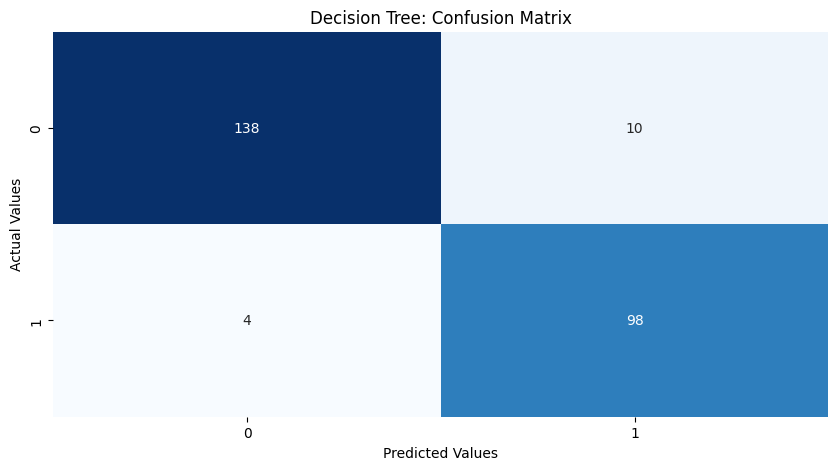

In [ ]:
for f1 in range(X_train.shape[1]):
    if FeatureImpR1[indicesR1[f1]] > 0:
        print("%d. feature %d (%f)" % (f1 + 1, indicesR1[f1], FeatureImpR1[indicesR1[f1]]))
        print ("feature name: ", feature_namesR1[indicesR1[f1]])

labels_predicted1 = decision_tree1.predict(X_test)
plt.subplots(figsize=(10,5))

conf_mat1 = confusion_matrix(y_test, labels_predicted1)
sns.heatmap(conf_mat1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Decision Tree: Confusion Matrix')

In [ ]:
print(classification_report(y_test, labels_predicted1))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       148
           1       0.91      0.96      0.93       102

    accuracy                           0.94       250
   macro avg       0.94      0.95      0.94       250
weighted avg       0.95      0.94      0.94       250



In [ ]:
decision_tree2 = DecisionTreeClassifier(criterion='gini', max_depth=13, min_samples_split=200, min_samples_leaf=3)
decision_tree2 = decision_tree2.fit(X_train, y_train)

fit_accuracy = decision_tree2.score(X_train, y_train)
test_accuracy = decision_tree2.score(X_test, y_test)

print("Train accuracy: {:.2%}".format(fit_accuracy))
print("Test accuracy: {:.2%}".format(test_accuracy))
print(decision_tree2)

Train accuracy: 98.13%
Test accuracy: 98.00%
DecisionTreeClassifier(max_depth=13, min_samples_leaf=3, min_samples_split=200)


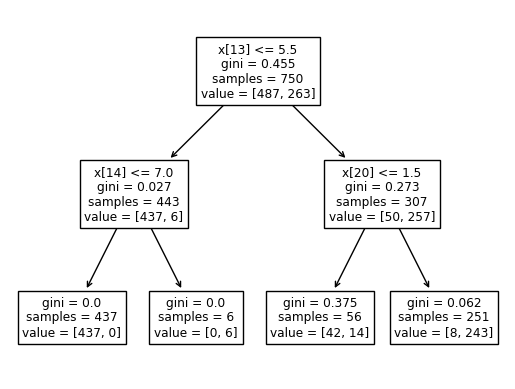

In [ ]:
tree.plot_tree(decision_tree)
plt.show()

In [ ]:
fig = plt.figure(figsize=(100,100))
_ = tree.plot_tree(decision_tree2,
                   feature_names=X.columns,
                   class_names= str(df.level),
                   filled=True)

In [ ]:
decision_tree_prediction2 = decision_tree2.predict(X_test)

bn_matrix_R = confusion_matrix(y_test, decision_tree_prediction2)
print("\nThe confusion matrix is:")
print(bn_matrix_R)


The confusion matrix is:
[[148   0]
 [  5  97]]


In [ ]:
FeatureImpR2=decision_tree2.feature_importances_
indicesR2 = np.argsort(FeatureImpR2)[::-1]
indicesR2
feature_namesR2 = X.columns
print ("feature name: ", feature_namesR1[indicesR1])

feature name:  Index(['coughing_of_blood', 'dry_cough', 'obesity', 'gender', 'air_pollution',
       'alcohol_use', 'dust_allergy', 'occupational_hazards', 'genetic_risk',
       'chronic_lung_disease', 'balanced_diet', 'smoking', 'frequent_cold',
       'passive_smoker', 'chest_pain', 'fatigue', 'weight_loss',
       'shortness_of_breath', 'wheezing', 'swallowing_difficulty',
       'clubbing_of_finger_nails', 'age'],
      dtype='object')


1. feature 13 (0.767428)
feature name:  coughing_of_blood
2. feature 20 (0.147320)
feature name:  frequent_cold
3. feature 19 (0.048323)
feature name:  clubbing_of_finger_nails
4. feature 14 (0.036929)
feature name:  fatigue


Text(0.5, 1.0, 'Decision Tree: Confusion Matrix')

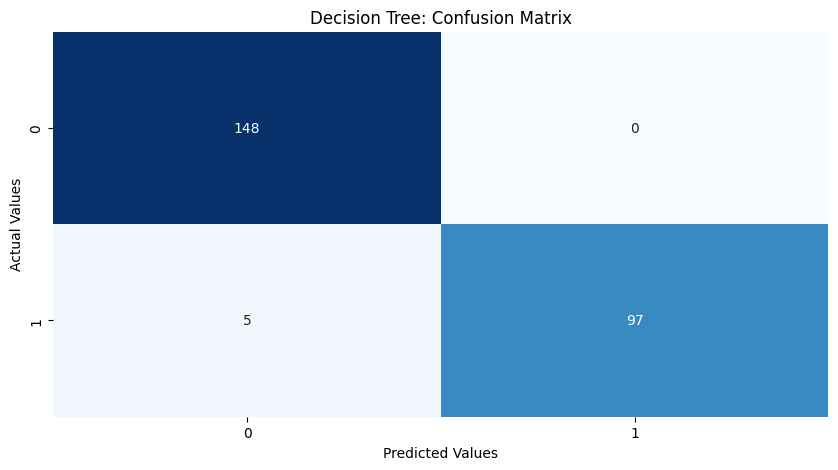

In [ ]:
for f1 in range(X_train.shape[1]):
    if FeatureImpR2[indicesR2[f1]] > 0:
        print("%d. feature %d (%f)" % (f1 + 1, indicesR2[f1], FeatureImpR2[indicesR2[f1]]))
        print ("feature name: ", feature_namesR2[indicesR2[f1]])

labels_predicted2 = decision_tree2.predict(X_test)
plt.subplots(figsize=(10,5))

conf_mat2 = confusion_matrix(y_test, labels_predicted2)
sns.heatmap(conf_mat2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Decision Tree: Confusion Matrix')

In [ ]:
print(classification_report(y_test, labels_predicted2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       148
           1       1.00      0.95      0.97       102

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



SVM

In [ ]:
from sklearn.svm import SVC,SVR

In [ ]:
clflinear = SVC(kernel='linear', C=1.0, probability=True)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clflinear.fit(X_train_scaled, y_train)

SVC(kernel='linear', probability=True)

In [ ]:
# Print training set accuracy
print("Training Set Accuracy:", clflinear.score(X_train, y_train))

# Confusion matrix on the training set
y_pred_train = clflinear.predict(X_train)
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix - Training Set:")
print(conf_matrix_train)

Training Set Accuracy: 0.3506666666666667
Confusion Matrix - Training Set:
[[  0 487]
 [  0 263]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [ ]:
#Linear Kernel

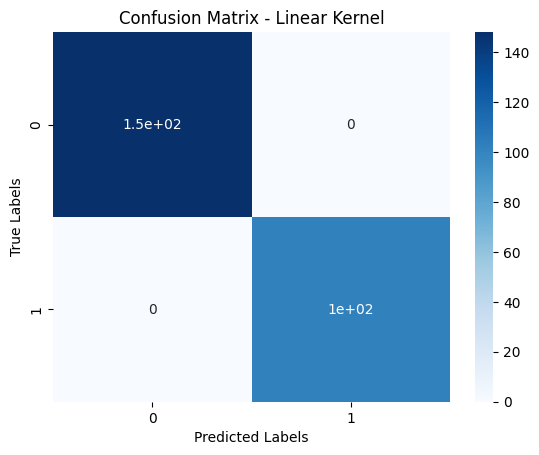



              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       102

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [ ]:
clflinear = SVC(kernel='linear',C=2, probability=True)
clflinear.fit(X_train, y_train)
y_pred_linear = clflinear.predict(X_test)
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)
sns.heatmap(conf_matrix_linear, annot=True, cmap="Blues")
plt.title("Confusion Matrix - Linear Kernel")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
print('\n')
print(classification_report(y_test, y_pred_linear))
importances = clflinear.coef_

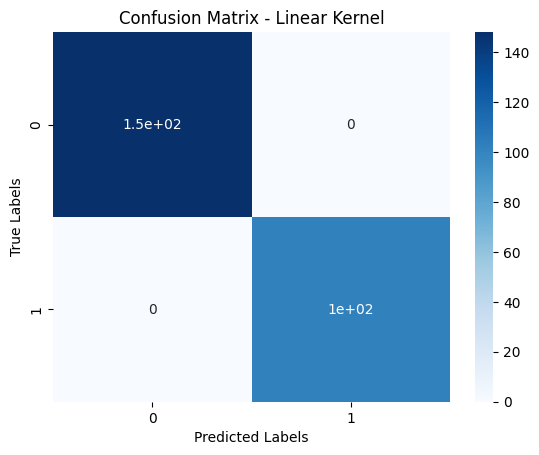



              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       102

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [ ]:
clflinear = SVC(kernel='linear',C=10, probability=True)
clflinear.fit(X_train, y_train)
y_pred_linear = clflinear.predict(X_test)
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)
sns.heatmap(conf_matrix_linear, annot=True, cmap="Blues")
plt.title("Confusion Matrix - Linear Kernel")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
print('\n')
print(classification_report(y_test, y_pred_linear))
importances = clflinear.coef_

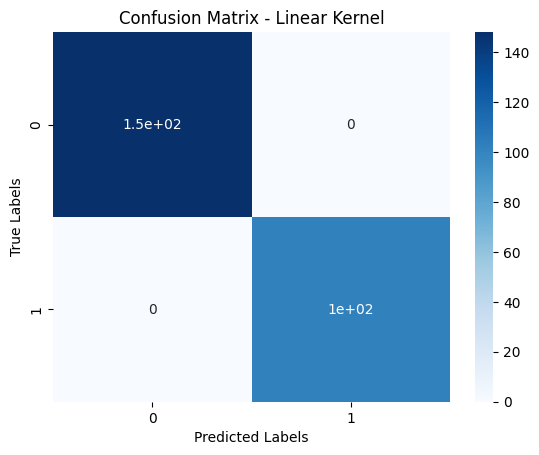



              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       102

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [ ]:
clflinear = SVC(kernel='linear',C=10, probability=True)
clflinear.fit(X_train, y_train)
y_pred_linear = clflinear.predict(X_test)
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)
sns.heatmap(conf_matrix_linear, annot=True, cmap="Blues")
plt.title("Confusion Matrix - Linear Kernel")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
print('\n')
print(classification_report(y_test, y_pred_linear))
importances = clflinear.coef_

In [ ]:
#RBF Kernel

Feature  Patient_ID  :  [-4.14226144e-05 -2.05303410e-06  5.67511312e-02  1.81575782e-01
 -6.67741682e-02 -7.40321083e-03  6.18598707e-02  1.20658011e-01
  5.87436952e-02  5.41756467e-02  1.41588578e-02  1.87593875e-01
  1.37303204e-01  1.96505719e-01  1.81274867e-01  1.01153307e-01
  1.56484265e-01 -1.15068652e-01  1.66750096e-01  1.30043935e-01
  7.37881236e-02  9.14000631e-02]


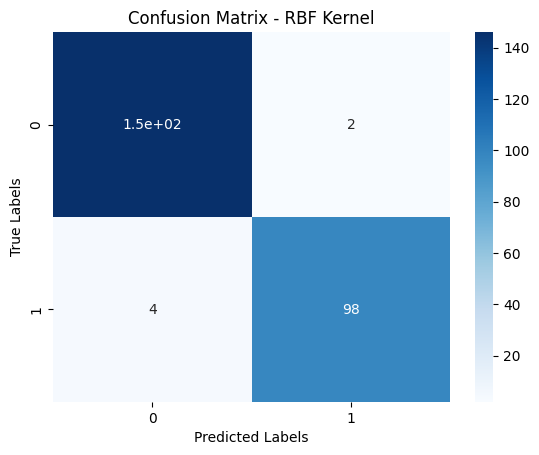



              precision    recall  f1-score   support

           0       0.97      0.99      0.98       148
           1       0.98      0.96      0.97       102

    accuracy                           0.98       250
   macro avg       0.98      0.97      0.98       250
weighted avg       0.98      0.98      0.98       250



In [ ]:
for i in range(importances.shape[0]):
    print("Feature ",df.columns[i], " : ", importances[i])

clfrbf = SVC(kernel='rbf', C=0.1, probability=True)
clfrbf.fit(X_train, y_train)
y_pred_rbf = clfrbf.predict(X_test)
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)
# Visualize confusion matrix
sns.heatmap(conf_matrix_rbf, annot=True, cmap="Blues")
plt.title("Confusion Matrix - RBF Kernel")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
print('\n')
print(classification_report(y_test, y_pred_rbf))

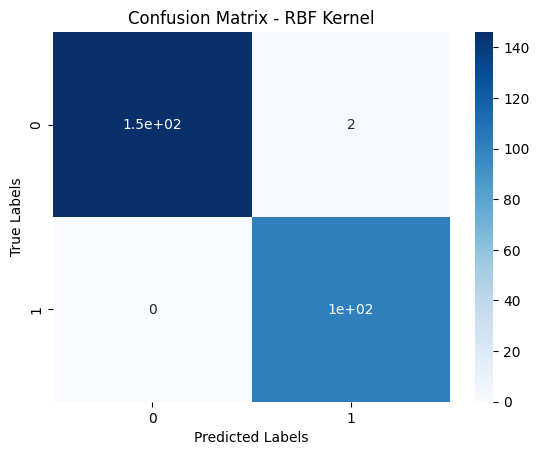



              precision    recall  f1-score   support

           0       1.00      0.99      0.99       148
           1       0.98      1.00      0.99       102

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250



In [ ]:
clfrbf = SVC(kernel='rbf', C=1, probability=True)
clfrbf.fit(X_train, y_train)
y_pred_rbf = clfrbf.predict(X_test)
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)
# Visualize confusion matrix
sns.heatmap(conf_matrix_rbf, annot=True, cmap="Blues")
plt.title("Confusion Matrix - RBF Kernel")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
print('\n')
print(classification_report(y_test, y_pred_rbf))

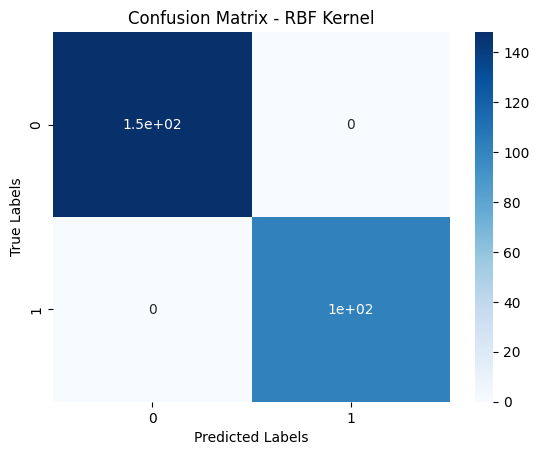



              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       102

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [ ]:
clfrbf = SVC(kernel='rbf', C=10, probability=True)
clfrbf.fit(X_train, y_train)
y_pred_rbf = clfrbf.predict(X_test)
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)
# Visualize confusion matrix
sns.heatmap(conf_matrix_rbf, annot=True, cmap="Blues")
plt.title("Confusion Matrix - RBF Kernel")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
print('\n')
print(classification_report(y_test, y_pred_rbf))

In [ ]:
#Polynomial Kernel

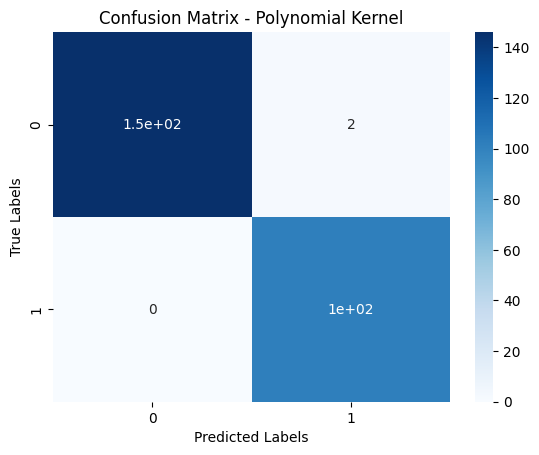



              precision    recall  f1-score   support

           0       1.00      0.99      0.99       148
           1       0.98      1.00      0.99       102

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250



In [ ]:
clfpoly = SVC(kernel='poly', degree=3, C=0.1, probability=True)
clfpoly.fit(X_train, y_train)
y_pred_poly = clfpoly.predict(X_test)
conf_matrix_poly = confusion_matrix(y_test, y_pred_poly)
# Visualize confusion matrix
sns.heatmap(conf_matrix_poly, annot=True, cmap="Blues")
plt.title("Confusion Matrix - Polynomial Kernel")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
print('\n')
print(classification_report(y_test, y_pred_poly))
from sklearn.inspection import permutation_importance
result = permutation_importance(clfpoly, X, y, n_repeats=10, random_state=0)
importances = result.importances_mean

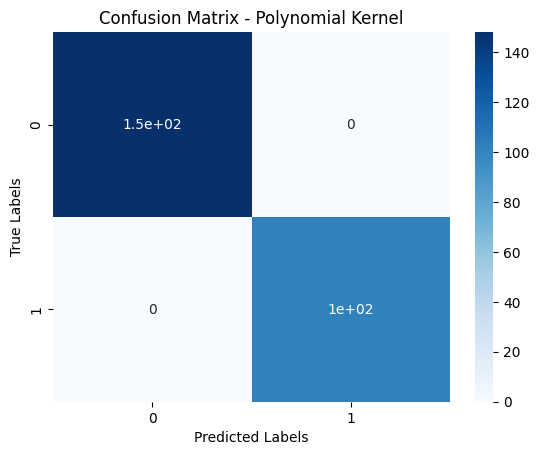



              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       102

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [ ]:
clfpoly = SVC(kernel='poly', degree=3, C=1, probability=True)
clfpoly.fit(X_train, y_train)
y_pred_poly = clfpoly.predict(X_test)
conf_matrix_poly = confusion_matrix(y_test, y_pred_poly)
# Visualize confusion matrix
sns.heatmap(conf_matrix_poly, annot=True, cmap="Blues")
plt.title("Confusion Matrix - Polynomial Kernel")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
print('\n')
print(classification_report(y_test, y_pred_poly))
from sklearn.inspection import permutation_importance
result = permutation_importance(clfpoly, X, y, n_repeats=10, random_state=0)
importances = result.importances_mean

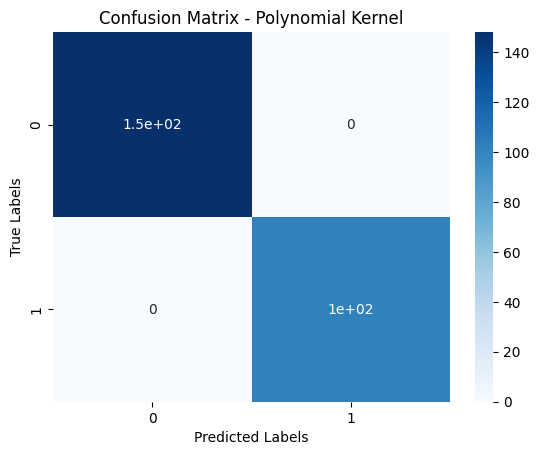



              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       102

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [ ]:
clfpoly = SVC(kernel='poly', degree=3, C=20, probability=True)
clfpoly.fit(X_train, y_train)
y_pred_poly = clfpoly.predict(X_test)
conf_matrix_poly = confusion_matrix(y_test, y_pred_poly)
# Visualize confusion matrix
sns.heatmap(conf_matrix_poly, annot=True, cmap="Blues")
plt.title("Confusion Matrix - Polynomial Kernel")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
print('\n')
print(classification_report(y_test, y_pred_poly))
from sklearn.inspection import permutation_importance
result = permutation_importance(clfpoly, X, y, n_repeats=10, random_state=0)
importances = result.importances_mean

In [ ]:
for i in range(importances.shape[0]):
    print("Feature ",df.columns[i], " : ", importances[i])

#!pip install --upgrade matplotlib

Feature  Patient_ID  :  0.01140000000000001
Feature  age  :  0.0
Feature  gender  :  0.0
Feature  air_pollution  :  0.04620000000000004
Feature  alcohol_use  :  0.0036000000000000034
Feature  dust_allergy  :  0.002200000000000002
Feature  occupational_hazards  :  0.0
Feature  genetic_risk  :  0.0
Feature  chronic_lung_disease  :  0.0
Feature  balanced_diet  :  0.00030000000000000024
Feature  obesity  :  0.0039000000000000033
Feature  smoking  :  0.04250000000000004
Feature  passive_smoker  :  0.0
Feature  chest_pain  :  0.018500000000000016
Feature  coughing_of_blood  :  0.046100000000000044
Feature  fatigue  :  0.0
Feature  weight_loss  :  0.036100000000000035
Feature  shortness_of_breath  :  0.0043000000000000035
Feature  wheezing  :  0.019100000000000016
Feature  swallowing_difficulty  :  0.0
Feature  clubbing_of_finger_nails  :  0.0
Feature  frequent_cold  :  0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


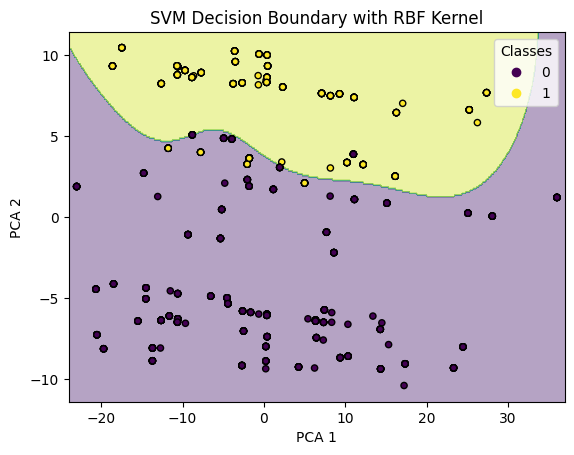

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

pcadata = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])
X = pcadata.copy()
y1 = df['label'].to_numpy()

x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Use the trained model to classify each point in the meshgrid
rbfsvm = SVC(kernel='rbf', C=10, probability=True)
rbfsvm.fit(X, y1)  # Use y1 as the target variable
Z = rbfsvm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the training points
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y1, s=20, edgecolor='k', cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('SVM Decision Boundary with RBF Kernel')
plt.legend(*scatter.legend_elements(), title='Classes')  # Add legend
plt.show()


